In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#loading datasets
dt = pd.read_csv('data.csv')
print(dt)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     70    1   4       130   322    0        2      109      0      2.4   
1     67    0   3       115   564    0        2      160      0      1.6   
2     57    1   2       124   261    0        0      141      0      0.3   
3     64    1   4       128   263    0        0      105      1      0.2   
4     74    0   2       120   269    0        2      121      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
265   52    1   3       172   199    1        0      162      0      0.5   
266   44    1   2       120   263    0        0      173      0      0.0   
267   56    0   2       140   294    0        2      153      0      1.3   
268   57    1   4       140   192    0        0      148      0      0.4   
269   67    1   4       160   286    0        2      108      1      1.5   

     slope  ca  thal  target  
0        2   3     3       2  
1        2   0     7     

In [3]:
#scaling the data 
dt['target'].replace({1:0, 2:1}, inplace=True)
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [4]:
#dt.info()

In [5]:
X = dt.drop(columns='target', axis=1)
Y =dt['target']

In [6]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [7]:
Y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2, stratify = Y)

In [9]:
print(X.shape, X_train.shape, X_test.shape)

(270, 13) (189, 13) (81, 13)


# Data standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler() 
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Building our Neural network.

In [12]:
#importing libraries for NN
import numpy as np
import tensorflow as tf
import random
from tensorflow import keras
import seaborn as sns
import tensorflow as tf #2.2.0

SEED=0
random.seed(SEED)
tf.random.set_seed(SEED)

ModuleNotFoundError: No module named 'tensorflow'

In [13]:
#CREATING LAYERS FOR NN
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(13,)),
     keras.layers.Dense(20, activation='relu'),
     keras.layers.Dense(20, activation='relu'),
     keras.layers.Dense(2, activation='sigmoid')
 ])

In [14]:
#compiling the NN
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [15]:
#training the ANN

visuo = model.fit(X_train_std, Y_train, validation_split=0.3, epochs = 10, batch_size = 10, )


Epoch 1/10
14/14 [==============================] - 5s 48ms/step - loss: 0.7013 - accuracy: 0.6061 - val_loss: 0.6368 - val_accuracy: 0.5965
Epoch 2/10
14/14 [==============================] - 0s 13ms/step - loss: 0.6136 - accuracy: 0.6970 - val_loss: 0.5813 - val_accuracy: 0.7193
Epoch 3/10
14/14 [==============================] - 0s 12ms/step - loss: 0.5530 - accuracy: 0.7727 - val_loss: 0.5455 - val_accuracy: 0.7544
Epoch 4/10
14/14 [==============================] - 0s 12ms/step - loss: 0.5076 - accuracy: 0.7727 - val_loss: 0.5198 - val_accuracy: 0.7719
Epoch 5/10
14/14 [==============================] - 0s 13ms/step - loss: 0.4729 - accuracy: 0.8182 - val_loss: 0.5004 - val_accuracy: 0.7895
Epoch 6/10
14/14 [==============================] - 0s 12ms/step - loss: 0.4449 - accuracy: 0.8182 - val_loss: 0.4832 - val_accuracy: 0.8070
Epoch 7/10
14/14 [==============================] - 0s 13ms/step - loss: 0.4198 - accuracy: 0.8258 - val_loss: 0.4705 - val_accuracy: 0.7895
Epoch 8/10
14

# accuracy on train data

In [16]:
los, accu = model.evaluate(X_train_std, Y_train)

print(accu)

6/6 [==============================] - 0s 4ms/step - loss: 0.3800 - accuracy: 0.8466
0.8465608358383179


# accuracy on test data

In [17]:
loss, accuracy = model.evaluate(X_test_std,Y_test)
print(accuracy)

3/3 [==============================] - 0s 4ms/step - loss: 0.4463 - accuracy: 0.8395
0.8395061492919922


# visualizing the neural network

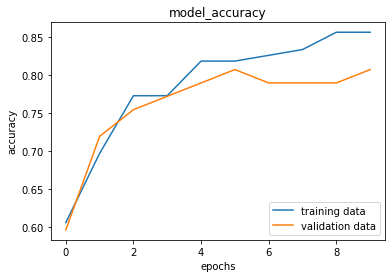

In [18]:
plt.plot(visuo.history['accuracy'])

plt.plot(visuo.history['val_accuracy'])
plt.title('model_accuracy')

plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc = 'lower right')

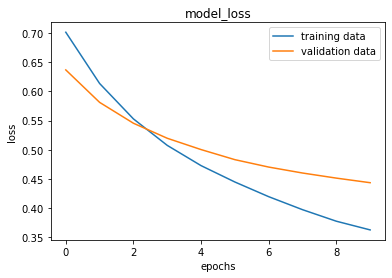

In [19]:
plt.plot(visuo.history['loss'])

plt.plot(visuo.history['val_loss'])
plt.title('model_loss')

plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [20]:
y_pred = model.predict(X_test_std)

print(y_pred.shape)
print(y_pred[1])

(81, 2)
[0.7662147 0.4247561]


In [21]:
print(X_test_std.shape)
print(y_pred[0])

(81, 13)
[0.7153654  0.37965572]


In [22]:
print(X_test_std)

[[-1.4566487   0.68199434  0.89117477 ... -0.97631526 -0.7194587
   1.17104356]
 [ 0.13165863  0.68199434 -1.21422562 ... -0.97631526 -0.7194587
  -0.89743525]
 [ 0.66109441  0.68199434 -0.16152543 ...  0.67121674 -0.7194587
  -0.89743525]
 ...
 [ 1.29641734  0.68199434  0.89117477 ...  0.67121674  1.58524798
   1.17104356]
 [ 1.29641734  0.68199434  0.89117477 ...  0.67121674  2.73760132
  -0.89743525]
 [ 0.23754579  0.68199434  0.89117477 ...  0.67121674  2.73760132
   1.17104356]]


In [23]:
print(y_pred)

[[0.7153654  0.37965572]
 [0.7662147  0.4247561 ]
 [0.55421823 0.5416314 ]
 [0.4100542  0.5627612 ]
 [0.637475   0.32028133]
 [0.6791271  0.5149358 ]
 [0.86237246 0.28994596]
 [0.6808132  0.45721236]
 [0.5195168  0.49097785]
 [0.34862387 0.75992274]
 [0.40585172 0.5553617 ]
 [0.22517508 0.9367448 ]
 [0.7366669  0.38166434]
 [0.31095958 0.9255473 ]
 [0.13110372 0.93141985]
 [0.5344315  0.75893736]
 [0.5023906  0.89583784]
 [0.74068594 0.54784805]
 [0.5601882  0.86788905]
 [0.7046403  0.61364335]
 [0.7828584  0.38826984]
 [0.6317667  0.6949041 ]
 [0.75569266 0.25828165]
 [0.18468335 0.6828901 ]
 [0.5724364  0.6914042 ]
 [0.81532794 0.35073784]
 [0.3258167  0.86685497]
 [0.56823015 0.76022786]
 [0.6364315  0.42923975]
 [0.5769276  0.49210435]
 [0.6507051  0.7076256 ]
 [0.64023376 0.8093274 ]
 [0.8327813  0.28137252]
 [0.7521664  0.3742282 ]
 [0.61061287 0.51941586]
 [0.45638195 0.8101644 ]
 [0.739879   0.35812986]
 [0.43296906 0.6051162 ]
 [0.5103561  0.5988642 ]
 [0.43834043 0.6192881 ]


In [24]:
Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [25]:
from tensorflow.math import confusion_matrix

In [26]:
confus_mat = confusion_matrix(Y_test, Y_pred_labels)

print(confus_mat)

tf.Tensor(
[[40  5]
 [ 8 28]], shape=(2, 2), dtype=int32)


<AxesSubplot:>

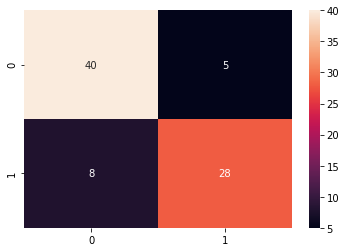

In [27]:
import seaborn as sns
sns.heatmap(confus_mat, annot=True)

In [28]:
from sklearn.metrics import classification_report

In [29]:
cr =  classification_report(Y_test, Y_pred_labels)

print(cr)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        45
           1       0.85      0.78      0.81        36

    accuracy                           0.84        81
   macro avg       0.84      0.83      0.84        81
weighted avg       0.84      0.84      0.84        81

